# Projet : Comparaison de Modèles de Régression (California Housing)

In [11]:
# Importation des librairies essentielles
import pandas as pd
import numpy as np
import math # Pour le calcul du RMSE 
import matplotlib.pyplot as plt

# Outils de Scikit-learn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

Préparation des données

In [6]:
# Charger le jeu de données
housing = fetch_california_housing(as_frame=True)

# Créer un DataFrame complet à partir de l'objet 'Bunch' (stocke tout)
data = housing.frame 

# Séparer les features (X) et la cible (Y)
# housing.feature_names contient les noms des colonnes d'entrée
X = data[housing.feature_names] 
Y = data['MedHouseVal'] # La valeur cible est la valeur médiane des maisons (en 100 000 USD)

# Afficher un aperçu des données et leurs dimensions
print("Aperçu des données (5 premières lignes) :", data.head())
print("Taille initiale de X (Features) :", X.shape)
print("Taille initiale de Y (Cible) :", Y.shape)

Aperçu des données (5 premières lignes) :    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Taille initiale de X (Features) : (20640, 8)
Taille initiale de Y (Cible) : (20640,)


Séparation des Ensembles (Train/Test Split)

In [7]:
# Séparation des données : 80% Entraînement, 20% Test
x_train, x_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42 
)

print("\nTaille de l'ensemble d'entraînement X :", x_train.shape)
print("Taille de l'ensemble de test X :", x_test.shape)


Taille de l'ensemble d'entraînement X : (16512, 8)
Taille de l'ensemble de test X : (4128, 8)


Entraînement et évalution des modèles

Fonction d'évaluation des performances

In [8]:
def evaluete_model(model, x_test, y_test):
    """""Calcule le MSE, le RMSE et le R2 Score pour un modèle donné."""
    # Prédictions
    predictions = model.predict(x_test)

    # Calcul des métriques
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    r2 = metrics.r2_score(y_test, predictions)

    return { 
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4),
        "R2 Score": round(r2, 4)
    }

Régression linéaire

In [9]:
# Instancier et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Évaluer le modèle de régression linéaire
linear_results= evaluete_model(linear_model, x_test, y_test)

print("REGRESSION LINÉAIRE")
print(linear_results)

REGRESSION LINÉAIRE
{'MSE': 0.5559, 'RMSE': 0.7456, 'R2 Score': 0.5758}


Arbre de décison

In [10]:
# Instancier et entraîner le modèle d'arbre de décision (apprentissage non linéaire)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

# Évaluer le modèle d'arbre de décision
tree_results= evaluete_model(tree_model, x_test, y_test)

print("\nARBRE DE DÉCISION")
print(tree_results)


ARBRE DE DÉCISION
{'MSE': 0.4952, 'RMSE': 0.7037, 'R2 Score': 0.6221}


Visualisation

 TABLEAU DE COMPARAISON DES MODÈLES 
                      MSE    RMSE  R2 Score
Linear Regression  0.5559  0.7456    0.5758
Decision Tree      0.4952  0.7037    0.6221


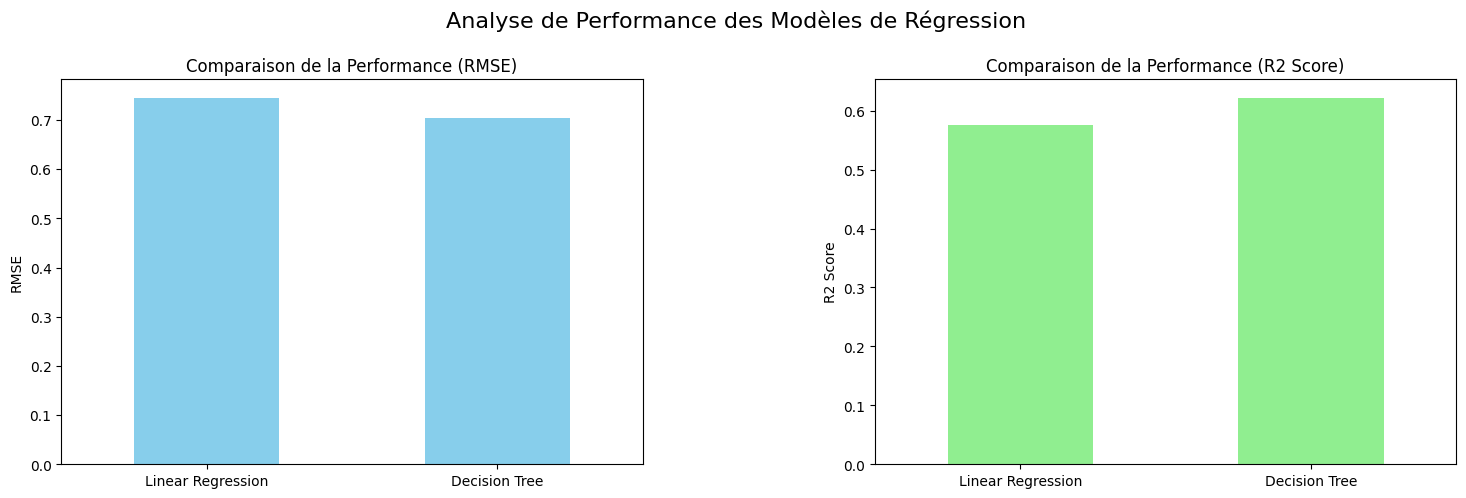

In [23]:
# Création d'un DataFrame pour comparer les résultats
comparaison_df = pd.DataFrame([linear_results,tree_results], index=['Linear Regression', 'Decision Tree'] )

# Affichage du tableau de comparaison
print (" TABLEAU DE COMPARAISON DES MODÈLES ")
print(comparaison_df)

#Visualisation des résultats
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.subplots_adjust(wspace=0.4)

# RMSE
comparaison_df['RMSE'].plot(kind='bar', ax=axes[0], rot=0, color='skyblue')
axes[0].set_title('Comparaison de la Performance (RMSE)')
axes[0].set_ylabel('RMSE')  


#R2 Score
comparaison_df['R2 Score'].plot(kind='bar', ax=axes[1], rot=0, color='lightgreen')
axes[1].set_title('Comparaison de la Performance (R2 Score)')
axes[1].set_ylabel('R2 Score')


# Afficher tous les graphiques
plt.suptitle('Analyse de Performance des Modèles de Régression', fontsize=16, y=1.02)
plt.show()



Prédictions contre Réalité 
- Ce graphique compare les valeurs réelles et prédites par le modèle de régression linéaire. La proximité des points par rapport à la droite idéale permet d’évaluer visuellement la qualité des prédictions.

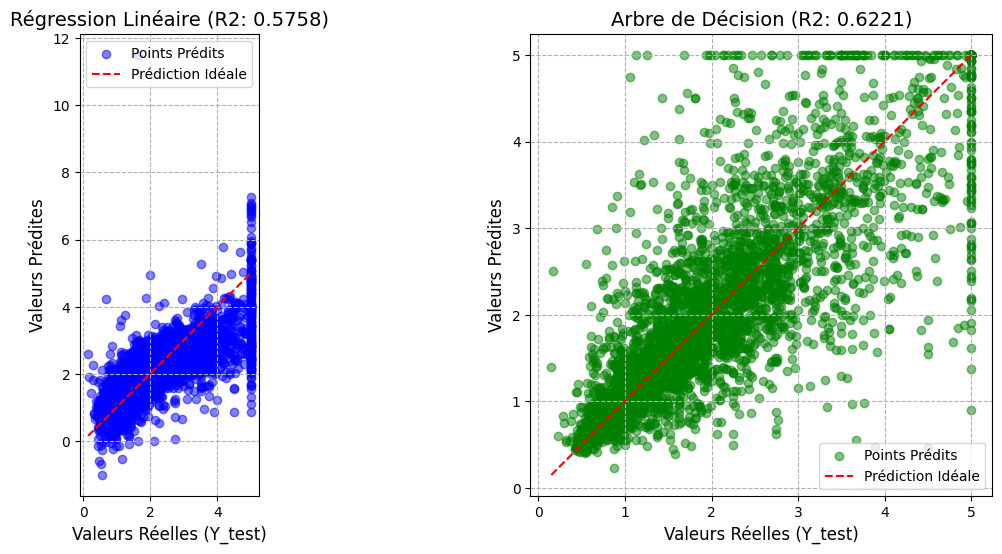

In [ ]:
linear_predictions = linear_model.predict(x_test)
tree_predictions = tree_model.predict(x_test)

fig,axes = plt.subplots(1,2, figsize=(14,6)) # Créer 1 ligne, 2 colonnes de graphiques

max_value = y_test.max()
min_value = y_test.min()


# Graphique pour la Régression Linéaire
axes[0].scatter(y_test, linear_predictions, alpha=0.5, color='blue', label='Points Prédits')

# Ligne idéale (45 degrés)
axes[0].plot([min_value, max_value], [min_value, max_value], 'r--', label='Prédiction Idéale')
axes[0].set_title(f'Régression Linéaire (R2: {linear_results["R2 Score"]})', fontsize=14)
axes[0].set_xlabel('Valeurs Réelles (Y_test)', fontsize=12)
axes[0].set_ylabel('Valeurs Prédites', fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--')
axes[0].set_aspect('equal', adjustable='box')


# Graphique pour l'Arbre de Décision

axes[1].scatter(y_test, tree_predictions, alpha=0.5, color='green', label='Points Prédits')
# Ligne idéale (45 degrés)
axes[1].plot([min_value, max_value], [min_value, max_value], 'r--', label='Prédiction Idéale')
axes[1].set_title(f'Arbre de Décision (R2: {tree_results["R2 Score"]})', fontsize=14)
axes[1].set_xlabel('Valeurs Réelles (Y_test)', fontsize=12)
axes[1].set_ylabel('Valeurs Prédites', fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='--')
axes[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


Analyse des erreurs
- L’analyse de la distribution des résidus permet d’évaluer la qualité des prédictions des modèles. Des résidus centrés autour de zéro et faiblement dispersés indiquent un modèle performant et peu biaisé.

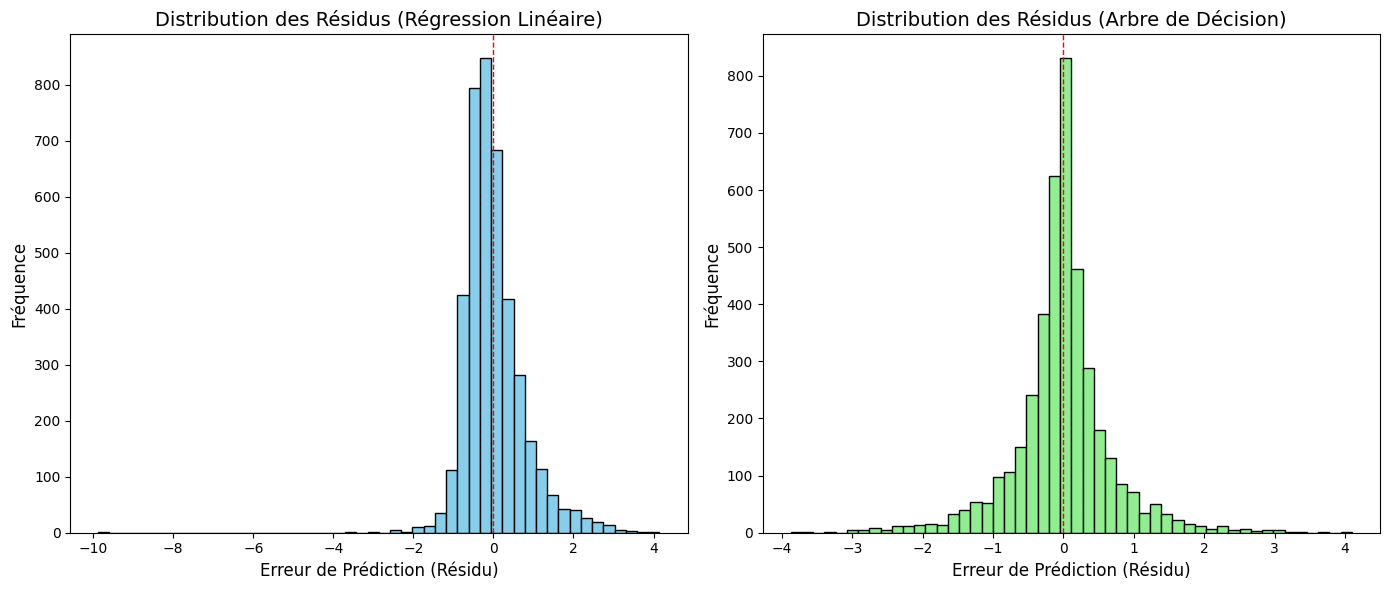

In [18]:
# Calculer les résidus pour chaque modèle
linear_residus = y_test - linear_predictions
tree_residus = y_test - tree_predictions

# Préparer les graphiques 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Créer 1 ligne, 2 colonnes de graphiques

# Graphique des résidus pour la Régression Linéaire
axes[0].hist(linear_residus, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution des Résidus (Régression Linéaire)', fontsize=14)
axes[0].set_xlabel('Erreur de Prédiction (Résidu)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].axvline(0, color='red', linestyle='dashed', linewidth=1) # Ligne à Erreur = 0

# Graphique des résidus pour l'Arbre de Décision
axes[1].hist(tree_residus, bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution des Résidus (Arbre de Décision)', fontsize=14)
axes[1].set_xlabel('Erreur de Prédiction (Résidu)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].axvline(0, color='red', linestyle='dashed', linewidth=1) # Ligne à Erreur = 0

plt.tight_layout()
plt.show()

## Conclusion 

L’analyse des distributions de résidus a montré que la régression linéaire produit des erreurs globalement plus concentrées autour de zéro et moins dispersées que l’arbre de décision, indiquant une meilleure stabilité des prédictions et une moindre présence d’erreurs extrêmes.

Cependant, cette observation visuelle doit être confrontée aux indicateurs quantitatifs de performance. Le tableau de comparaison montre que l’arbre de décision obtient de meilleurs résultats numériques, avec une MSE plus faible (0.4952 contre 0.5559), une RMSE inférieure (0.7037 contre 0.7456) et un coefficient de détermination R² plus élevé (0.6221 contre 0.5758). Ces valeurs indiquent que, d’un point de vue purement métrique, l’arbre de décision explique une plus grande part de la variance des données et commet en moyenne des erreurs légèrement plus faibles.

Ainsi, bien que l’arbre de décision présente de meilleures performances globales selon les métriques, l’analyse des résidus met en évidence une variabilité plus importante des erreurs, suggérant un comportement moins stable et un risque potentiel de sur-apprentissage. À l’inverse, la régression linéaire, malgré des scores légèrement inférieurs, offre des prédictions plus régulières et plus robustes.

En conclusion, l’arbre de décision apparaît plus performant selon les indicateurs MSE, RMSE et R², tandis que la régression linéaire se distingue par une meilleure stabilité des erreurs, ce qui met en évidence le compromis classique entre performance globale et robustesse du modèle.